In [199]:
import json
import hashlib
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, date

%matplotlib inline

# Step 1

# A

In [166]:
with open('./DataEngineeringQ2.json') as f:
    json_data = json.load(f)

len(json_data)

31

In [167]:
data = []
for p in json_data:
    p_data = {}
    p_data['appointmentId'] = p['appointmentId']
    p_data['phoneNumber'] = p['phoneNumber']
    
    p_data['firstName'] = p['patientDetails'].get('firstName')
    p_data['lastName'] = p['patientDetails'].get('lastName')
    p_data['gender'] = p['patientDetails'].get('gender')
    p_data['birthDate'] = p['patientDetails'].get('birthDate')
    p_data['medicines'] = p['consultationData'].get('medicines')
    
    data.append(p_data)
    
len(data)

31

In [168]:
df = pd.DataFrame(data)
df

,appointmentId,phoneNumber,firstName,lastName,gender,birthDate,medicines
0,40d2-9c9f,96686896670,Css,,,None,"[{'medicineId': '619404', 'medicineName': 'A',..."
1,40dbtc9f,9496368916,Lokesh,,M,1996-05-16T18:30:00.000Z,"[{'medicineId': '619404', 'medicineName': 'A',..."
2,g3Wt5c9f,7787204833,Shila,Das,None,None,"[{'medicineId': '619404', 'medicineName': 'B',..."
3,fb6-a535,9376756879,Bhavika,Ben Panchal,F,1988-04-24T14:30:00.000Z,"[{'medicineId': '619704', 'medicineName': 'B',..."
4,67h7KL9,5267384241,Raghu Viju,,None,None,"[{'medicineId': '619384', 'medicineName': 'D',..."
5,Hy7Y91,+919826374025,Dinesh Kumar,,M,1983-05-16T18:30:00.000Z,"[{'medicineId': '643404', 'medicineName': 'A',..."
6,10dY8a-4a,7587265252,Lalit,Sankhwal,M,2003-06-27T14:30:00.000Z,"[{'medicineId': '632304', 'medicineName': 'D',..."
7,e8056Ye8,5586958767,Ravi,,None,None,"[{'medicineId': '619404', 'medicineName': 'A',..."
8,dbc0-c66b,9987602525,Dinesh,,M,1983-05-16T18:30:00.000Z,"[{'medicineId': '619504', 'medicineName': 'E',..."
9,1576a7,9234354366,Sanjay,,M,1998-05-16T18:30:00.000Z,[]


In [169]:
def transform_gender(gender):
    if gender == 'M':
        return 'male'
    if gender == 'F':
        return 'female'
    return 'others'


df['gender'] = df['gender'].map(transform_gender)
df

,appointmentId,phoneNumber,firstName,lastName,gender,birthDate,medicines
0,40d2-9c9f,96686896670,Css,,others,None,"[{'medicineId': '619404', 'medicineName': 'A',..."
1,40dbtc9f,9496368916,Lokesh,,male,1996-05-16T18:30:00.000Z,"[{'medicineId': '619404', 'medicineName': 'A',..."
2,g3Wt5c9f,7787204833,Shila,Das,others,None,"[{'medicineId': '619404', 'medicineName': 'B',..."
3,fb6-a535,9376756879,Bhavika,Ben Panchal,female,1988-04-24T14:30:00.000Z,"[{'medicineId': '619704', 'medicineName': 'B',..."
4,67h7KL9,5267384241,Raghu Viju,,others,None,"[{'medicineId': '619384', 'medicineName': 'D',..."
5,Hy7Y91,+919826374025,Dinesh Kumar,,male,1983-05-16T18:30:00.000Z,"[{'medicineId': '643404', 'medicineName': 'A',..."
6,10dY8a-4a,7587265252,Lalit,Sankhwal,male,2003-06-27T14:30:00.000Z,"[{'medicineId': '632304', 'medicineName': 'D',..."
7,e8056Ye8,5586958767,Ravi,,others,None,"[{'medicineId': '619404', 'medicineName': 'A',..."
8,dbc0-c66b,9987602525,Dinesh,,male,1983-05-16T18:30:00.000Z,"[{'medicineId': '619504', 'medicineName': 'E',..."
9,1576a7,9234354366,Sanjay,,male,1998-05-16T18:30:00.000Z,[]


In [170]:
df = df.rename(columns={'birthDate': 'DOB'})
df

,appointmentId,phoneNumber,firstName,lastName,gender,DOB,medicines
0,40d2-9c9f,96686896670,Css,,others,None,"[{'medicineId': '619404', 'medicineName': 'A',..."
1,40dbtc9f,9496368916,Lokesh,,male,1996-05-16T18:30:00.000Z,"[{'medicineId': '619404', 'medicineName': 'A',..."
2,g3Wt5c9f,7787204833,Shila,Das,others,None,"[{'medicineId': '619404', 'medicineName': 'B',..."
3,fb6-a535,9376756879,Bhavika,Ben Panchal,female,1988-04-24T14:30:00.000Z,"[{'medicineId': '619704', 'medicineName': 'B',..."
4,67h7KL9,5267384241,Raghu Viju,,others,None,"[{'medicineId': '619384', 'medicineName': 'D',..."
5,Hy7Y91,+919826374025,Dinesh Kumar,,male,1983-05-16T18:30:00.000Z,"[{'medicineId': '643404', 'medicineName': 'A',..."
6,10dY8a-4a,7587265252,Lalit,Sankhwal,male,2003-06-27T14:30:00.000Z,"[{'medicineId': '632304', 'medicineName': 'D',..."
7,e8056Ye8,5586958767,Ravi,,others,None,"[{'medicineId': '619404', 'medicineName': 'A',..."
8,dbc0-c66b,9987602525,Dinesh,,male,1983-05-16T18:30:00.000Z,"[{'medicineId': '619504', 'medicineName': 'E',..."
9,1576a7,9234354366,Sanjay,,male,1998-05-16T18:30:00.000Z,[]


# B

In [171]:
df['fullName'] = df['firstName'] + " " + df['lastName']
df['fullName'] = df['fullName'].map(lambda x : x.strip())
df

,appointmentId,phoneNumber,firstName,lastName,gender,DOB,medicines,fullName
0,40d2-9c9f,96686896670,Css,,others,None,"[{'medicineId': '619404', 'medicineName': 'A',...",Css
1,40dbtc9f,9496368916,Lokesh,,male,1996-05-16T18:30:00.000Z,"[{'medicineId': '619404', 'medicineName': 'A',...",Lokesh
2,g3Wt5c9f,7787204833,Shila,Das,others,None,"[{'medicineId': '619404', 'medicineName': 'B',...",Shila Das
3,fb6-a535,9376756879,Bhavika,Ben Panchal,female,1988-04-24T14:30:00.000Z,"[{'medicineId': '619704', 'medicineName': 'B',...",Bhavika Ben Panchal
4,67h7KL9,5267384241,Raghu Viju,,others,None,"[{'medicineId': '619384', 'medicineName': 'D',...",Raghu Viju
5,Hy7Y91,+919826374025,Dinesh Kumar,,male,1983-05-16T18:30:00.000Z,"[{'medicineId': '643404', 'medicineName': 'A',...",Dinesh Kumar
6,10dY8a-4a,7587265252,Lalit,Sankhwal,male,2003-06-27T14:30:00.000Z,"[{'medicineId': '632304', 'medicineName': 'D',...",Lalit Sankhwal
7,e8056Ye8,5586958767,Ravi,,others,None,"[{'medicineId': '619404', 'medicineName': 'A',...",Ravi
8,dbc0-c66b,9987602525,Dinesh,,male,1983-05-16T18:30:00.000Z,"[{'medicineId': '619504', 'medicineName': 'E',...",Dinesh
9,1576a7,9234354366,Sanjay,,male,1998-05-16T18:30:00.000Z,[],Sanjay


# C

In [172]:
def is_valid_mobile(number):
    if number is None or number == '':
        return False

    if number.startswith('91'):
        number = number[2:]
    elif number.startswith('+91'):
        number = number[3:]

    return int(number) >= 6000000000 and int(number) <= 9999999999


df['isValidMobile'] = df['phoneNumber'].map(is_valid_mobile)
df

,appointmentId,phoneNumber,firstName,lastName,gender,DOB,medicines,fullName,isValidMobile
0,40d2-9c9f,96686896670,Css,,others,None,"[{'medicineId': '619404', 'medicineName': 'A',...",Css,False
1,40dbtc9f,9496368916,Lokesh,,male,1996-05-16T18:30:00.000Z,"[{'medicineId': '619404', 'medicineName': 'A',...",Lokesh,True
2,g3Wt5c9f,7787204833,Shila,Das,others,None,"[{'medicineId': '619404', 'medicineName': 'B',...",Shila Das,True
3,fb6-a535,9376756879,Bhavika,Ben Panchal,female,1988-04-24T14:30:00.000Z,"[{'medicineId': '619704', 'medicineName': 'B',...",Bhavika Ben Panchal,True
4,67h7KL9,5267384241,Raghu Viju,,others,None,"[{'medicineId': '619384', 'medicineName': 'D',...",Raghu Viju,False
5,Hy7Y91,+919826374025,Dinesh Kumar,,male,1983-05-16T18:30:00.000Z,"[{'medicineId': '643404', 'medicineName': 'A',...",Dinesh Kumar,True
6,10dY8a-4a,7587265252,Lalit,Sankhwal,male,2003-06-27T14:30:00.000Z,"[{'medicineId': '632304', 'medicineName': 'D',...",Lalit Sankhwal,True
7,e8056Ye8,5586958767,Ravi,,others,None,"[{'medicineId': '619404', 'medicineName': 'A',...",Ravi,False
8,dbc0-c66b,9987602525,Dinesh,,male,1983-05-16T18:30:00.000Z,"[{'medicineId': '619504', 'medicineName': 'E',...",Dinesh,True
9,1576a7,9234354366,Sanjay,,male,1998-05-16T18:30:00.000Z,[],Sanjay,True


# D

In [173]:
hash_values = []
for row, rowseries in df.iterrows():
    if rowseries['isValidMobile']:
        number = rowseries['phoneNumber']
        if number.startswith('91'):
            number = number[2:]
        elif number.startswith('+91'):
            number = number[3:]
        
        res = hashlib.sha256(number.encode()).hexdigest()
    else:
        res = None
    hash_values.append(res)

df['phoneNumberHash'] = hash_values
df

,appointmentId,phoneNumber,firstName,lastName,gender,DOB,medicines,fullName,isValidMobile,phoneNumberHash
0,40d2-9c9f,96686896670,Css,,others,None,"[{'medicineId': '619404', 'medicineName': 'A',...",Css,False,None
1,40dbtc9f,9496368916,Lokesh,,male,1996-05-16T18:30:00.000Z,"[{'medicineId': '619404', 'medicineName': 'A',...",Lokesh,True,895215dc5419e347db19d058296f7c490536e8a309a562...
2,g3Wt5c9f,7787204833,Shila,Das,others,None,"[{'medicineId': '619404', 'medicineName': 'B',...",Shila Das,True,35b812a459810275cc320ee5629c9a6f0d40ed49a429f7...
3,fb6-a535,9376756879,Bhavika,Ben Panchal,female,1988-04-24T14:30:00.000Z,"[{'medicineId': '619704', 'medicineName': 'B',...",Bhavika Ben Panchal,True,353262b7228e47c5390bc25b1cafcceeba2b8eda66bab5...
4,67h7KL9,5267384241,Raghu Viju,,others,None,"[{'medicineId': '619384', 'medicineName': 'D',...",Raghu Viju,False,None
5,Hy7Y91,+919826374025,Dinesh Kumar,,male,1983-05-16T18:30:00.000Z,"[{'medicineId': '643404', 'medicineName': 'A',...",Dinesh Kumar,True,a222f59bd3a23b4b32d5d7af18c9944ff9673a71aa37b1...
6,10dY8a-4a,7587265252,Lalit,Sankhwal,male,2003-06-27T14:30:00.000Z,"[{'medicineId': '632304', 'medicineName': 'D',...",Lalit Sankhwal,True,6a9e56bf7975de92556f5f35106a2aa87ba5ce2dbef0be...
7,e8056Ye8,5586958767,Ravi,,others,None,"[{'medicineId': '619404', 'medicineName': 'A',...",Ravi,False,None
8,dbc0-c66b,9987602525,Dinesh,,male,1983-05-16T18:30:00.000Z,"[{'medicineId': '619504', 'medicineName': 'E',...",Dinesh,True,c6fd63dd1f5f582d09261139a36b1b5d37e797293094d0...
9,1576a7,9234354366,Sanjay,,male,1998-05-16T18:30:00.000Z,[],Sanjay,True,39d7d08df507c0e49776010645fcb3efb226e529025b5d...


# E

In [174]:
age = []
today = date.today()
for row, rowseries in df.iterrows():
    if rowseries['DOB'] is None:
        age.append(None)
        continue

    dob = rowseries['DOB'][:10]
    birthdate = datetime.strptime(dob, '%Y-%m-%d')
    one_or_zero = ((today.month, today.day) < (birthdate.month, birthdate.day))
    year_difference = today.year - birthdate.year
    res = year_difference - one_or_zero
    age.append(res)

df['Age'] = age
df

,appointmentId,phoneNumber,firstName,lastName,gender,DOB,medicines,fullName,isValidMobile,phoneNumberHash,Age
0,40d2-9c9f,96686896670,Css,,others,None,"[{'medicineId': '619404', 'medicineName': 'A',...",Css,False,None,NaN
1,40dbtc9f,9496368916,Lokesh,,male,1996-05-16T18:30:00.000Z,"[{'medicineId': '619404', 'medicineName': 'A',...",Lokesh,True,895215dc5419e347db19d058296f7c490536e8a309a562...,27.0
2,g3Wt5c9f,7787204833,Shila,Das,others,None,"[{'medicineId': '619404', 'medicineName': 'B',...",Shila Das,True,35b812a459810275cc320ee5629c9a6f0d40ed49a429f7...,NaN
3,fb6-a535,9376756879,Bhavika,Ben Panchal,female,1988-04-24T14:30:00.000Z,"[{'medicineId': '619704', 'medicineName': 'B',...",Bhavika Ben Panchal,True,353262b7228e47c5390bc25b1cafcceeba2b8eda66bab5...,35.0
4,67h7KL9,5267384241,Raghu Viju,,others,None,"[{'medicineId': '619384', 'medicineName': 'D',...",Raghu Viju,False,None,NaN
5,Hy7Y91,+919826374025,Dinesh Kumar,,male,1983-05-16T18:30:00.000Z,"[{'medicineId': '643404', 'medicineName': 'A',...",Dinesh Kumar,True,a222f59bd3a23b4b32d5d7af18c9944ff9673a71aa37b1...,40.0
6,10dY8a-4a,7587265252,Lalit,Sankhwal,male,2003-06-27T14:30:00.000Z,"[{'medicineId': '632304', 'medicineName': 'D',...",Lalit Sankhwal,True,6a9e56bf7975de92556f5f35106a2aa87ba5ce2dbef0be...,19.0
7,e8056Ye8,5586958767,Ravi,,others,None,"[{'medicineId': '619404', 'medicineName': 'A',...",Ravi,False,None,NaN
8,dbc0-c66b,9987602525,Dinesh,,male,1983-05-16T18:30:00.000Z,"[{'medicineId': '619504', 'medicineName': 'E',...",Dinesh,True,c6fd63dd1f5f582d09261139a36b1b5d37e797293094d0...,40.0
9,1576a7,9234354366,Sanjay,,male,1998-05-16T18:30:00.000Z,[],Sanjay,True,39d7d08df507c0e49776010645fcb3efb226e529025b5d...,25.0


# F

In [175]:
df['noOfMedicines'] = df['medicines'].map(lambda x : len(x))
df

,appointmentId,phoneNumber,firstName,lastName,gender,DOB,medicines,fullName,isValidMobile,phoneNumberHash,Age,noOfMedicines
0,40d2-9c9f,96686896670,Css,,others,None,"[{'medicineId': '619404', 'medicineName': 'A',...",Css,False,None,NaN,2
1,40dbtc9f,9496368916,Lokesh,,male,1996-05-16T18:30:00.000Z,"[{'medicineId': '619404', 'medicineName': 'A',...",Lokesh,True,895215dc5419e347db19d058296f7c490536e8a309a562...,27.0,2
2,g3Wt5c9f,7787204833,Shila,Das,others,None,"[{'medicineId': '619404', 'medicineName': 'B',...",Shila Das,True,35b812a459810275cc320ee5629c9a6f0d40ed49a429f7...,NaN,3
3,fb6-a535,9376756879,Bhavika,Ben Panchal,female,1988-04-24T14:30:00.000Z,"[{'medicineId': '619704', 'medicineName': 'B',...",Bhavika Ben Panchal,True,353262b7228e47c5390bc25b1cafcceeba2b8eda66bab5...,35.0,1
4,67h7KL9,5267384241,Raghu Viju,,others,None,"[{'medicineId': '619384', 'medicineName': 'D',...",Raghu Viju,False,None,NaN,2
5,Hy7Y91,+919826374025,Dinesh Kumar,,male,1983-05-16T18:30:00.000Z,"[{'medicineId': '643404', 'medicineName': 'A',...",Dinesh Kumar,True,a222f59bd3a23b4b32d5d7af18c9944ff9673a71aa37b1...,40.0,4
6,10dY8a-4a,7587265252,Lalit,Sankhwal,male,2003-06-27T14:30:00.000Z,"[{'medicineId': '632304', 'medicineName': 'D',...",Lalit Sankhwal,True,6a9e56bf7975de92556f5f35106a2aa87ba5ce2dbef0be...,19.0,2
7,e8056Ye8,5586958767,Ravi,,others,None,"[{'medicineId': '619404', 'medicineName': 'A',...",Ravi,False,None,NaN,1
8,dbc0-c66b,9987602525,Dinesh,,male,1983-05-16T18:30:00.000Z,"[{'medicineId': '619504', 'medicineName': 'E',...",Dinesh,True,c6fd63dd1f5f582d09261139a36b1b5d37e797293094d0...,40.0,1
9,1576a7,9234354366,Sanjay,,male,1998-05-16T18:30:00.000Z,[],Sanjay,True,39d7d08df507c0e49776010645fcb3efb226e529025b5d...,25.0,0


In [176]:
def get_active_meds(meds):
    res = 0
    for med in meds:
        if med['isActive']:
            res += 1
    return res


df['noOfActiveMedicines'] = df['medicines'].map(get_active_meds)
df

,appointmentId,phoneNumber,firstName,lastName,gender,DOB,medicines,fullName,isValidMobile,phoneNumberHash,Age,noOfMedicines,noOfActiveMedicines
0,40d2-9c9f,96686896670,Css,,others,None,"[{'medicineId': '619404', 'medicineName': 'A',...",Css,False,None,NaN,2,1
1,40dbtc9f,9496368916,Lokesh,,male,1996-05-16T18:30:00.000Z,"[{'medicineId': '619404', 'medicineName': 'A',...",Lokesh,True,895215dc5419e347db19d058296f7c490536e8a309a562...,27.0,2,1
2,g3Wt5c9f,7787204833,Shila,Das,others,None,"[{'medicineId': '619404', 'medicineName': 'B',...",Shila Das,True,35b812a459810275cc320ee5629c9a6f0d40ed49a429f7...,NaN,3,2
3,fb6-a535,9376756879,Bhavika,Ben Panchal,female,1988-04-24T14:30:00.000Z,"[{'medicineId': '619704', 'medicineName': 'B',...",Bhavika Ben Panchal,True,353262b7228e47c5390bc25b1cafcceeba2b8eda66bab5...,35.0,1,1
4,67h7KL9,5267384241,Raghu Viju,,others,None,"[{'medicineId': '619384', 'medicineName': 'D',...",Raghu Viju,False,None,NaN,2,2
5,Hy7Y91,+919826374025,Dinesh Kumar,,male,1983-05-16T18:30:00.000Z,"[{'medicineId': '643404', 'medicineName': 'A',...",Dinesh Kumar,True,a222f59bd3a23b4b32d5d7af18c9944ff9673a71aa37b1...,40.0,4,2
6,10dY8a-4a,7587265252,Lalit,Sankhwal,male,2003-06-27T14:30:00.000Z,"[{'medicineId': '632304', 'medicineName': 'D',...",Lalit Sankhwal,True,6a9e56bf7975de92556f5f35106a2aa87ba5ce2dbef0be...,19.0,2,2
7,e8056Ye8,5586958767,Ravi,,others,None,"[{'medicineId': '619404', 'medicineName': 'A',...",Ravi,False,None,NaN,1,1
8,dbc0-c66b,9987602525,Dinesh,,male,1983-05-16T18:30:00.000Z,"[{'medicineId': '619504', 'medicineName': 'E',...",Dinesh,True,c6fd63dd1f5f582d09261139a36b1b5d37e797293094d0...,40.0,1,1
9,1576a7,9234354366,Sanjay,,male,1998-05-16T18:30:00.000Z,[],Sanjay,True,39d7d08df507c0e49776010645fcb3efb226e529025b5d...,25.0,0,0


In [177]:
df['noOfInActiveMedicines'] = df['noOfMedicines'] - df['noOfActiveMedicines']
df

,appointmentId,phoneNumber,firstName,lastName,gender,DOB,medicines,fullName,isValidMobile,phoneNumberHash,Age,noOfMedicines,noOfActiveMedicines,noOfInActiveMedicines
0,40d2-9c9f,96686896670,Css,,others,None,"[{'medicineId': '619404', 'medicineName': 'A',...",Css,False,None,NaN,2,1,1
1,40dbtc9f,9496368916,Lokesh,,male,1996-05-16T18:30:00.000Z,"[{'medicineId': '619404', 'medicineName': 'A',...",Lokesh,True,895215dc5419e347db19d058296f7c490536e8a309a562...,27.0,2,1,1
2,g3Wt5c9f,7787204833,Shila,Das,others,None,"[{'medicineId': '619404', 'medicineName': 'B',...",Shila Das,True,35b812a459810275cc320ee5629c9a6f0d40ed49a429f7...,NaN,3,2,1
3,fb6-a535,9376756879,Bhavika,Ben Panchal,female,1988-04-24T14:30:00.000Z,"[{'medicineId': '619704', 'medicineName': 'B',...",Bhavika Ben Panchal,True,353262b7228e47c5390bc25b1cafcceeba2b8eda66bab5...,35.0,1,1,0
4,67h7KL9,5267384241,Raghu Viju,,others,None,"[{'medicineId': '619384', 'medicineName': 'D',...",Raghu Viju,False,None,NaN,2,2,0
5,Hy7Y91,+919826374025,Dinesh Kumar,,male,1983-05-16T18:30:00.000Z,"[{'medicineId': '643404', 'medicineName': 'A',...",Dinesh Kumar,True,a222f59bd3a23b4b32d5d7af18c9944ff9673a71aa37b1...,40.0,4,2,2
6,10dY8a-4a,7587265252,Lalit,Sankhwal,male,2003-06-27T14:30:00.000Z,"[{'medicineId': '632304', 'medicineName': 'D',...",Lalit Sankhwal,True,6a9e56bf7975de92556f5f35106a2aa87ba5ce2dbef0be...,19.0,2,2,0
7,e8056Ye8,5586958767,Ravi,,others,None,"[{'medicineId': '619404', 'medicineName': 'A',...",Ravi,False,None,NaN,1,1,0
8,dbc0-c66b,9987602525,Dinesh,,male,1983-05-16T18:30:00.000Z,"[{'medicineId': '619504', 'medicineName': 'E',...",Dinesh,True,c6fd63dd1f5f582d09261139a36b1b5d37e797293094d0...,40.0,1,1,0
9,1576a7,9234354366,Sanjay,,male,1998-05-16T18:30:00.000Z,[],Sanjay,True,39d7d08df507c0e49776010645fcb3efb226e529025b5d...,25.0,0,0,0


# G

In [178]:
med_names = []
for row, rowseries in df.iterrows():
    names = []
    for meds in rowseries['medicines']:
        if meds['isActive']:
            names.append(meds['medicineName'])
    if len(names) > 0:
        med_names.append(",".join(names))
    else:
        med_names.append(None)

df['medicineNames'] = med_names
df

,appointmentId,phoneNumber,firstName,lastName,gender,DOB,medicines,fullName,isValidMobile,phoneNumberHash,Age,noOfMedicines,noOfActiveMedicines,noOfInActiveMedicines,medicineNames
0,40d2-9c9f,96686896670,Css,,others,None,"[{'medicineId': '619404', 'medicineName': 'A',...",Css,False,None,NaN,2,1,1,A
1,40dbtc9f,9496368916,Lokesh,,male,1996-05-16T18:30:00.000Z,"[{'medicineId': '619404', 'medicineName': 'A',...",Lokesh,True,895215dc5419e347db19d058296f7c490536e8a309a562...,27.0,2,1,1,A
2,g3Wt5c9f,7787204833,Shila,Das,others,None,"[{'medicineId': '619404', 'medicineName': 'B',...",Shila Das,True,35b812a459810275cc320ee5629c9a6f0d40ed49a429f7...,NaN,3,2,1,"B,C"
3,fb6-a535,9376756879,Bhavika,Ben Panchal,female,1988-04-24T14:30:00.000Z,"[{'medicineId': '619704', 'medicineName': 'B',...",Bhavika Ben Panchal,True,353262b7228e47c5390bc25b1cafcceeba2b8eda66bab5...,35.0,1,1,0,B
4,67h7KL9,5267384241,Raghu Viju,,others,None,"[{'medicineId': '619384', 'medicineName': 'D',...",Raghu Viju,False,None,NaN,2,2,0,"D,A"
5,Hy7Y91,+919826374025,Dinesh Kumar,,male,1983-05-16T18:30:00.000Z,"[{'medicineId': '643404', 'medicineName': 'A',...",Dinesh Kumar,True,a222f59bd3a23b4b32d5d7af18c9944ff9673a71aa37b1...,40.0,4,2,2,"A,E"
6,10dY8a-4a,7587265252,Lalit,Sankhwal,male,2003-06-27T14:30:00.000Z,"[{'medicineId': '632304', 'medicineName': 'D',...",Lalit Sankhwal,True,6a9e56bf7975de92556f5f35106a2aa87ba5ce2dbef0be...,19.0,2,2,0,"D,E"
7,e8056Ye8,5586958767,Ravi,,others,None,"[{'medicineId': '619404', 'medicineName': 'A',...",Ravi,False,None,NaN,1,1,0,A
8,dbc0-c66b,9987602525,Dinesh,,male,1983-05-16T18:30:00.000Z,"[{'medicineId': '619504', 'medicineName': 'E',...",Dinesh,True,c6fd63dd1f5f582d09261139a36b1b5d37e797293094d0...,40.0,1,1,0,E
9,1576a7,9234354366,Sanjay,,male,1998-05-16T18:30:00.000Z,[],Sanjay,True,39d7d08df507c0e49776010645fcb3efb226e529025b5d...,25.0,0,0,0,None


# Step 2

In [179]:
cols = [
    'appointmentId',
    'fullName',
    'phoneNumber',
    'isValidMobile',
    'phoneNumberHash',
    'gender',
    'DOB',
    'Age',
    'noOfMedicines',
    'noOfActiveMedicines',
    'noOfInActiveMedicines',
    'medicineNames'
]

export_df = df.loc[:, cols]
export_df

,appointmentId,fullName,phoneNumber,isValidMobile,phoneNumberHash,gender,DOB,Age,noOfMedicines,noOfActiveMedicines,noOfInActiveMedicines,medicineNames
0,40d2-9c9f,Css,96686896670,False,None,others,None,NaN,2,1,1,A
1,40dbtc9f,Lokesh,9496368916,True,895215dc5419e347db19d058296f7c490536e8a309a562...,male,1996-05-16T18:30:00.000Z,27.0,2,1,1,A
2,g3Wt5c9f,Shila Das,7787204833,True,35b812a459810275cc320ee5629c9a6f0d40ed49a429f7...,others,None,NaN,3,2,1,"B,C"
3,fb6-a535,Bhavika Ben Panchal,9376756879,True,353262b7228e47c5390bc25b1cafcceeba2b8eda66bab5...,female,1988-04-24T14:30:00.000Z,35.0,1,1,0,B
4,67h7KL9,Raghu Viju,5267384241,False,None,others,None,NaN,2,2,0,"D,A"
5,Hy7Y91,Dinesh Kumar,+919826374025,True,a222f59bd3a23b4b32d5d7af18c9944ff9673a71aa37b1...,male,1983-05-16T18:30:00.000Z,40.0,4,2,2,"A,E"
6,10dY8a-4a,Lalit Sankhwal,7587265252,True,6a9e56bf7975de92556f5f35106a2aa87ba5ce2dbef0be...,male,2003-06-27T14:30:00.000Z,19.0,2,2,0,"D,E"
7,e8056Ye8,Ravi,5586958767,False,None,others,None,NaN,1,1,0,A
8,dbc0-c66b,Dinesh,9987602525,True,c6fd63dd1f5f582d09261139a36b1b5d37e797293094d0...,male,1983-05-16T18:30:00.000Z,40.0,1,1,0,E
9,1576a7,Sanjay,9234354366,True,39d7d08df507c0e49776010645fcb3efb226e529025b5d...,male,1998-05-16T18:30:00.000Z,25.0,0,0,0,None


In [183]:
try:
    export_df.to_csv('Q2_result.csv', sep='~', index=False)
    print('Exported to Q2_result.csv')
except Exception as e:
    print('Error, unable to export', e)

Exported to Q2_result.csv


# H

# 1

In [196]:
json_data = {}
json_data['Age'] = df['Age'].tolist()
json_data['gender'] = df['gender'].tolist()
json_data['validPhoneNumbers'] = int(df['isValidMobile'].sum())
json_data['appointments'] = len(set(df['appointmentId'].tolist()))
json_data['medicines'] = int(df['noOfMedicines'].sum())
json_data['activeMedicines'] = int(df['noOfActiveMedicines'].sum())

try:
    with open('Q2_result.json', 'w') as f:
        json.dump(json_data, f)
    print('Exported to Q2_result.json')
except Exception as e:
    print('Error, unable to export', e)

Exported to Q2_result.json


# 2

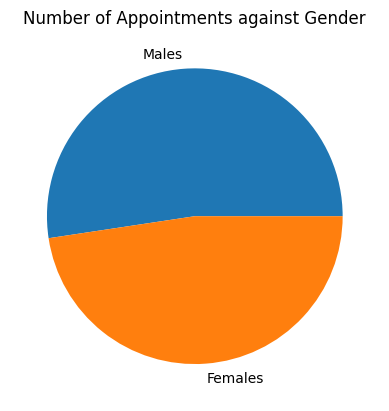

In [206]:
n_males = 0
n_females = 0
for row, rowseries in export_df.iterrows():
    if rowseries['gender'] == 'male':
        n_males += 1
    elif rowseries['gender'] == 'female':
        n_females += 1
        
data = [n_males, n_females]
labels = ['Males', 'Females']
total = n_males + n_females

plt.pie(data, labels=labels)
plt.title('Number of Appointments against Gender')
plt.savefig('App_against_gender.png')
plt.show()